# Empalme con la clase anterior

La recomendacion es que miren los codigos en las notas de clase.

# GANs: Generative Adversarial Networks:
Redes adversarial generativas.
Este trabajo fue desarrollado por Ian J. Goodfellow et. al. 2014.
(referencia en las notas de clase).
El concepto es bien interesante.

La idea es de dos redes
Para explicar voy a formular el model del detective y el
falsificador.
* La $D$ discriminator: Por ejemplo el detective.
El trabajo del detective es juzgar la muestra que le entra
y decir si es "fake" o no. Es falso o no. Estamos viendo
una salida binaria. F o V ($y=1$ o $y=0$).
* La $G$ generator. Este es el falsificador. Que comienza a hacer un mal trabajo, pero con ayuda de la calificacion del detective lo va perfeccionando.

Vamos a mostrar un par de figuras para explicar mejor el proceso.

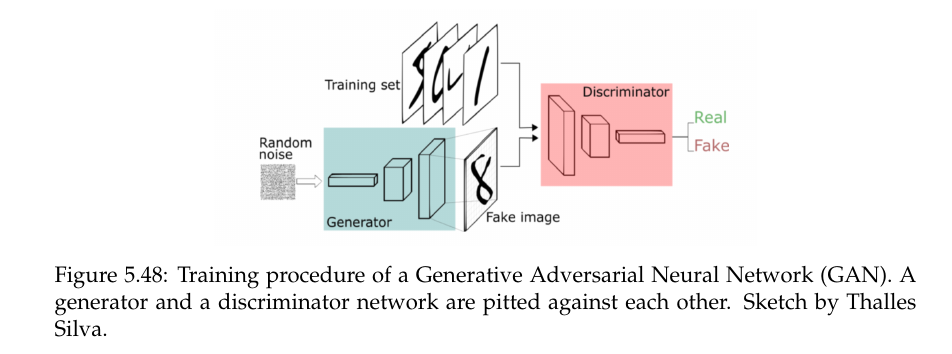

i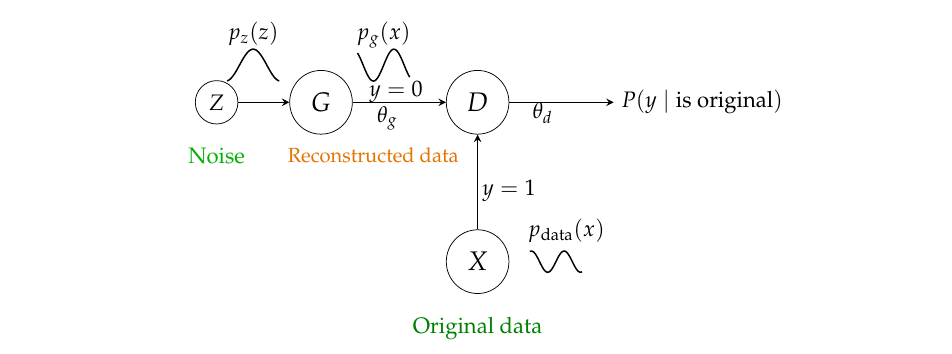

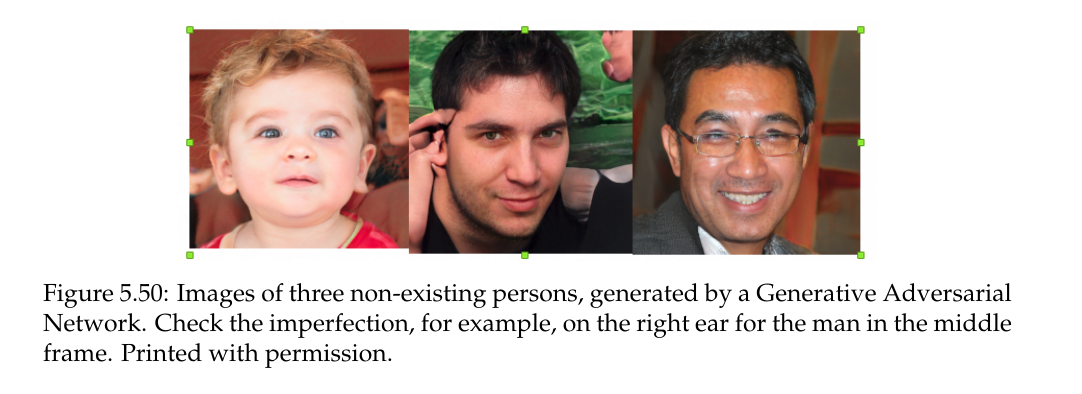

La figura de arriba viene de la pagina
[This person does not exist](https://thispersondoesnotexist.com/).

La figura del centro tiene un artifacto en el oido derecho de la persona. Lo que lo hace pensar a uno que la imagen es "fake".

Comenzamos con una funcion de costo (perdida), para una sola muestra $x$

$$\log D(x) + \log (1 - D(G(z)) $$
Expliqemos esta funcion de costo. La idea del discriminador $D$ es hacer esta funcion maxima (maximizar). Mire que maximar $D$ esta en el sendido de lo que quiere el discriminador, por que $D$ se comporta como una probabilidad. Por ejemplo si $D=1$ entonces hay seguridad de que el discriminador adivino si la muestra es falsa o no. Que pasa con el segundo termino. Fijense que es el complemento (de alguna forma) del primero. Observe que $D(G(z))$ indica que la muestra es falsa. Fue generada de ruido por el generador $G$, y por lo tanto el discriminador $D$ quiere maximizar $1 - D(G(z))$, por que esto automanicamente minimiza $D(G(z))$

De otro lado el generador $G$ debe minimizar
$$\log (1 - D(G(z)) $$
por que esto maximiza la probabilidad de que $D(G(z))$ sea equivocada para el discriminador. Maximiza el enganho.

Esto fue para una sola muestra ($x$, $z$). Entonces la funcion de costo la vemos estadisticamente como una esperanza y escribimos

$$\mathbb{E}_{x \sim p_{\text{data}}}  [ \log D(x)] +
\mathbb{E}_{z \sim p} [ \log (1 - D(G(z))]$$
Esto se puede puede escribir de varias formas

Para un conjunto de muestras con distribucion estadistica:
* Para el discriminador $D$:
    * Si las probabilidades son discretas

    $$\sum_{i=1}^m \log  D(x_i) p_{\text{data}}(x) +
\log[ (1 - D( G(z))) \ p (z) $$

    * Si es  continua es una integral. Cambie la suma por integral.

* Para el generador.
    * El caso discreto
    $$ \sum_{i=1}^m \log (1 - D(G(z_i)) p_z $$
    * En el continuo esto es una integral.


En la esta ultima funcion de costo tiene problemas con el vanishing gradient.  En vez de minimizar esto (lo que hace el generado).
se usa normalmente la minimizacion de

$$\min_G \mathbb{E}_{z \sim p_z} [ - \log D(G(z)] $$

Ambas funciones de costo se pueden ver como un **minimax game**
donde se fusionan en una sola funcio de costo

$$\min_G \max_D  
\mathbb{E}_{x \sim p_{\text{data}}}  [ \log D(x)] +
\mathbb{E}_{z \sim p} [ \log (1 - D(G(z))] \tag{1} $$
Esta corresponde a la ecuacion (1) del articulo original.
Sin embargo en la practica eso no se hace simulaneamente, se hace una y
luego la otra como lo vamo a ver en el algoritmo.

Vamos a opimizar la funcion de costo (perdida) (1)
Lo vamos a hacer en dos pasos:

Pensemos en la funcion de costo com $V(D,G)$, maximizamos
sobre $D$ y luego minimizamos sobre $G$.
1. Encontrar el maximo sobre $D$ de la funcion de costo


$$ \max_D V_G(D) = \max_D \left [
\mathbb{E}_{x \sim p_{\text{data}}}  [ \log D(x)] +
\mathbb{E}_{z \sim p} [ \log (1 - D(G(z))] \tag{1} \right ] $$
Vamos a encontrar que este maximo se da en

$$D_G^*(x) = \frac{p_{\text{data}}(x)}{p_{\text{data}}(x) + p_g(x)} $$

2. Una encontremos este maximo, buscamos el minimo sobre $G$ de
$V_G(D^*_G)$. Seguimos a Goodfellow et al. Ellos llaman a la siguiene
funcion $V(G,D)$.

\begin{eqnarray}
V_G(D) &=& \int_x \log D(x)  p_{\text{data}}(x) dx + \int_z \log (1 - D(g(z)) dz  \\
&=& \int_x \log D(x) p_{\text{data}})(x) + \log (1 - D(x)) p_g(x) dx \tag{3}
\end{eqnarray}
La ecuacion (3) del articulo original.

En este momento queremos ver el integrando como una funcion donde la variable es $D(x)$. Es decir

$$ f(D(x)) = \log D(x) p_{\text{data}}(x) + \log (1 - D(x)) p_g(x) \$$
Goodfellow y amigos hacen otra cosa que lo que ya hago aca. Yo uso calculo diferencial

$$\frac{d}{d D(x)} f(D(x)) =  \frac{p_{\text{data}}(x)}{D(x)} - \frac{p_g(x)}{1 - D(x)} = 0 $$

Calculo diferencial nos dice que igualemos la derivada a 0.
Igualando a cero encontramos

$$ \frac{p_{\text{data}}(x)}{D(x)} =  \frac{p_g(x)}{1 - D(x)} $$
Debemos despejar $D(x)$.

\begin{eqnarray}
p_{\text{data}}(x) (1 - D(x)) &=& p_g(x) D(x) \\
p_{\text{data}}(x) &=& (p_{\text{data}}(x) + p_g(x)) D(x)
D(x) &=& \frac{p_{\text{data}}}{p_{\text{data}} + p_g(x)}.  \tag{2}
\end{eqnarray}

Nota: En general para probar que algo es maximo o es minimo
se debe calcular la segunda derivada. Si es $>0$ es maximo
si es $<0$ es minimo, si es$=0$, no se sabe (inflexion). Sin
embargo lo que estamos maximizando es un logaritmo que es concavo. O sea que es un maximo.

Vamos para el segundo paso que es **minimizacion**
Vamos a insertar $D^*_G(x)$ en la ecuacion (3) pero escribiendo esperanzas en vez de integrales.
Llamos $C(G)$ a la funcio que queremos minimizar. De forma que tenemos

Reemplazmos la ecuacion (2) en $V_G(D)$, o sea $V_G(D^*_G(x))$
\begin{eqnarray}
C(G) &=& \max_D V_G(D) \\
&=& \mathbb{E}_{x \sim p_{\text{data}}}(x)[ \log D^*_G(x)] + \mathbb{E}_{z \sim p_z} [ \log (1 - D_G^*( G(z) ))] \\
&=& \mathbb{E}_{x \sim p_{\text{data}}}(x)[ \log D^*_G(x)] + \mathbb{E}_{z \sim p_z} [ \log (1 - D_G^*( x ))] \\
&=& \mathbb{E}_{x \sim p_{\text{data}}}(x) \left [ \log
\frac{p_{\text{data}}(x)}{p_{\text{data}}(x) + p_g(x)}
\right ] + \mathbb{E}_{z \sim p_z} \left [ \log \left (1 -
\frac{p_{\text{data}}(x)}{p_{\text{data}}(x) + p_g(x)}
\right ) \right ] \\
&=& \mathbb{E}_{x \sim p_{\text{data}}(x)}(x) \left [ \log
\frac{p_{\text{data}}(x)}{p_{\text{data}(x)} + p_g(x)}
\right ] + \mathbb{E}_{z \sim p_z} \left [ \log \left (
\frac{p_g(x)}{p_{\text{data}}(x) + p_g(x)}
\right ) \right ] \\
&=& \mathbb{E}_{x \sim p_{\text{data}}(x)}(x) \left [ \log 2
\frac{p_{\text{data}}(x)}{p_{\text{data}(x)} + p_g(x)}
\right ] + \mathbb{E}_{z \sim p_z} \left [ \log 2 \left (
\frac{p_g(x)}{p_{\text{data}}(x) + p_g(x)}
\right ) \right ] - 2 \log 2 \\
&=& \mathbb{E}_{x \sim p_{\text{data}}(x)}(x) \left [ \log  
\frac{p_{\text{data}}(x)}{\frac{p_{\text{data}(x)} + p_g(x)}{2}}
\right ] + \mathbb{E}_{z \sim p_z} \left [ \log  \left (
\frac{p_g(x)}{\frac{p_{\text{data}}(x) + p_g(x)}{2}}
\right ) \right ] - 2 \log 2 \\
&=& D_{KL} \left ( p_{\text{data}}(x) \parallel  \frac{p_{\text{data}}(x) + p_g(x) }{2} \right )
 +  D_{KL} \left ( p_g(x) \parallel  \frac{p_{\text{data}}(x) + p_g(x) }{2} \right )  - 2 \log 2
 \tag{5}
\end{eqnarray}







En la proxima clase terminamos con
* La ecuacion (6) del articulo original
* Un ejemplo en Python.